Some cells have %%capture to avoid overcrowding the display.

# Data Analysis Project: Social Media Usage and Emotional Well-Being

This notebook presents a comprehensive analysis of three datasets (`train.csv`, `val.csv`, and `test.csv`) capturing information on social media usage and users' dominant emotional states. The dataset explores the relationship between social media usage patterns and emotional well-being.

## Dataset Features

- **User_ID**: Unique identifier for the user.
- **Age**: Age of the user.
- **Gender**: Gender of the user (Female, Male, Non-binary).
- **Platform**: Social media platform used (e.g., Instagram, Twitter, Facebook, LinkedIn, Snapchat, WhatsApp, Telegram).
- **Daily_Usage_Time (minutes)**: Daily time spent on the platform in minutes.
- **Posts_Per_Day**: Number of posts made per day.
- **Likes_Received_Per_Day**: Number of likes received per day.
- **Comments_Received_Per_Day**: Number of comments received per day.
- **Messages_Sent_Per_Day**: Number of messages sent per day.
- **Dominant_Emotion**: User's dominant emotional state during the day (e.g., Happiness, Sadness, Anger, Anxiety, Boredom, Neutral).

## Files

- **train.csv**: Data for training models.
- **test.csv**: Data for testing models.
- **val.csv**: Data for validation purposes.

## Usage

This dataset can be used for various analyses, including but not limited to:

- Predicting users' emotional well-being based on their social media usage.
- Clustering users based on usage patterns.
- Examining the impact of different platforms on users' emotions.


## Dataset Citation

This dataset was meticulously researched and prepared by AI Inventor Emirhan BULUT. If you use this dataset in your work, please cite or reference it as follows:

BULUT, E. "Social Media Usage and Emotional Well-Being Dataset." (https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being).



# Importing Libraries

In [1]:
%%capture
!conda install flaml
!conda install -U ipywidgets
!conda install -c conda-forge voila
# Import necessary libraries and modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from flaml import AutoML

# Set the style for the plots
sns.set(style="whitegrid")

# Ensure all warnings are ignored
import warnings
warnings.filterwarnings('ignore')

# For inline plots in Jupyter Notebook
%matplotlib inline


# Loading the Data

First, we need to load the datasets into pandas DataFrames. This will allow us to manipulate and analyze the data effectively.


In [2]:
# Function to load CSV and handle errors
def load_csv_with_error_handling(filepath):
    try:
        return pd.read_csv(filepath)
    except pd.errors.ParserError:
        print(f"Error reading {filepath}. Trying with on_bad_lines='skip'.")
        return pd.read_csv(filepath, on_bad_lines='skip')

# Load the datasets
train_df = load_csv_with_error_handling('train.csv')
val_df = load_csv_with_error_handling('val.csv')
test_df = load_csv_with_error_handling('test.csv')
test_df = pd.concat([val_df, test_df]).reset_index(drop=True)


Error reading val.csv. Trying with on_bad_lines='skip'.


# Data Overview

We will now take a look at the basic structure and summary statistics of the datasets. This includes checking the data types, non-null counts, and basic descriptive statistics.


In [3]:
# Display the first few rows of training dataset
display(train_df.head())

# Display the shape of the DataFrame to check the number of rows and columns
print(train_df.shape)

# Basic information about the datasets
print("Train Dataset Info:")
train_df.info()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


(1001, 10)
Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


# Exploratory Data Analysis (EDA)

In this section, we will visualize the data to gain insights into the distribution of different features and the relationships between them. This step helps in understanding the underlying patterns and trends in the data.


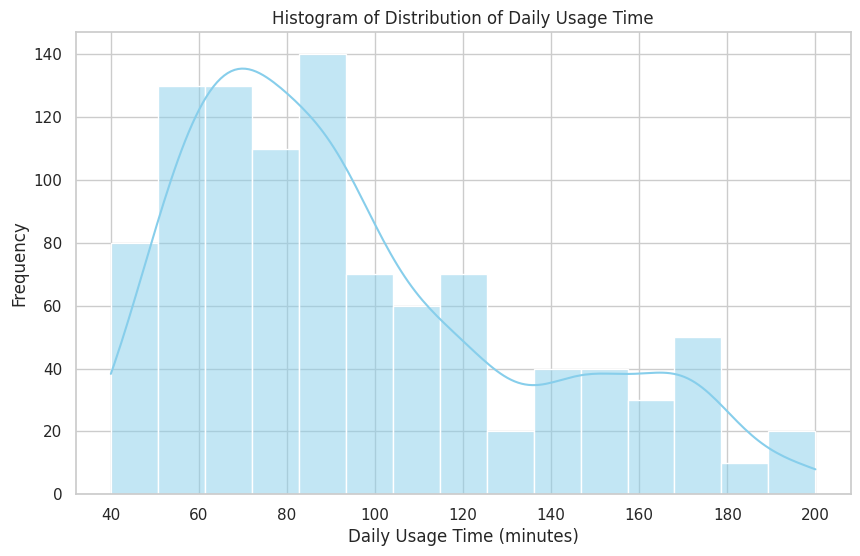

In [4]:
# Distribution of Daily Usage Time
plt.figure(figsize=(10, 6))
ax = sns.histplot(train_df['Daily_Usage_Time (minutes)'], kde=True, color = 'skyblue')
plt.title('Histogram of Distribution of Daily Usage Time')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)

# Save the figure as a PNG file
plt.savefig('daily_usage_time_distribution.png')

# Show the plot
plt.show()


### Distribution of Daily Usage Time

The histogram above shows the distribution of the daily usage time of social media platforms among users. It helps us understand how much time users typically spend on social media each day.


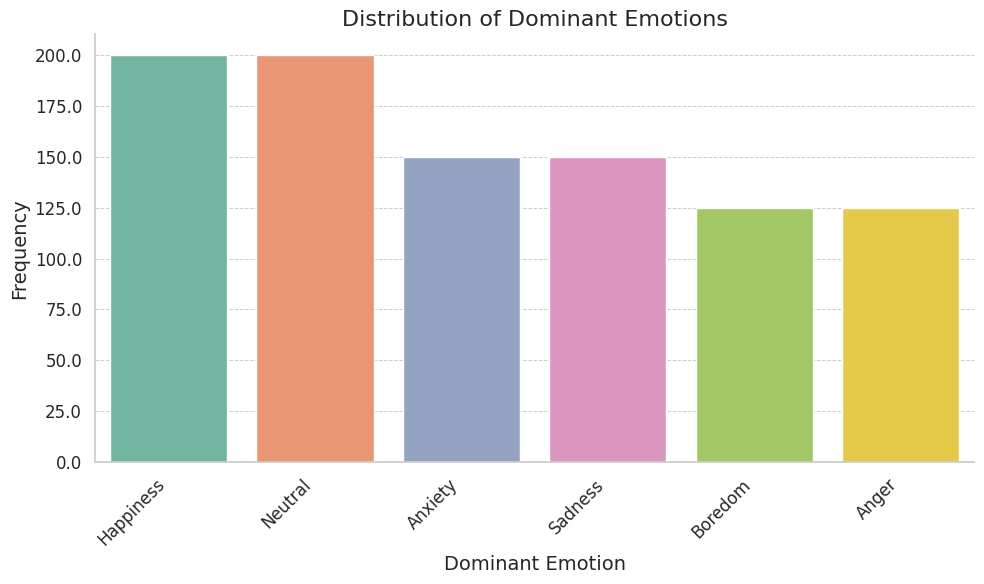

In [5]:
# Sample data (replace this with your actual data)
dominant_emotions = ['Happiness', 'Neutral', 'Anxiety', 'Sadness', 'Boredom', 'Anger']
frequencies = [200, 200, 150, 150, 125, 125]

# Creating a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=dominant_emotions, y=frequencies, palette="Set2")

# Adding labels and title
plt.title('Distribution of Dominant Emotions', fontsize=16)
plt.xlabel('Dominant Emotion', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjusting font sizes for x and y ticks
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
barplot.set_yticklabels(barplot.get_yticks(), fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Removing the top and right spines for a cleaner look
sns.despine()

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('dominant_emotions_distribution.png')

# Show the plot
plt.show()



### Distribution of Dominant Emotions

The bar chart above illustrates the frequency of different dominant emotional states among users. This visualization gives us an overview of the prevalent emotional states in the dataset.


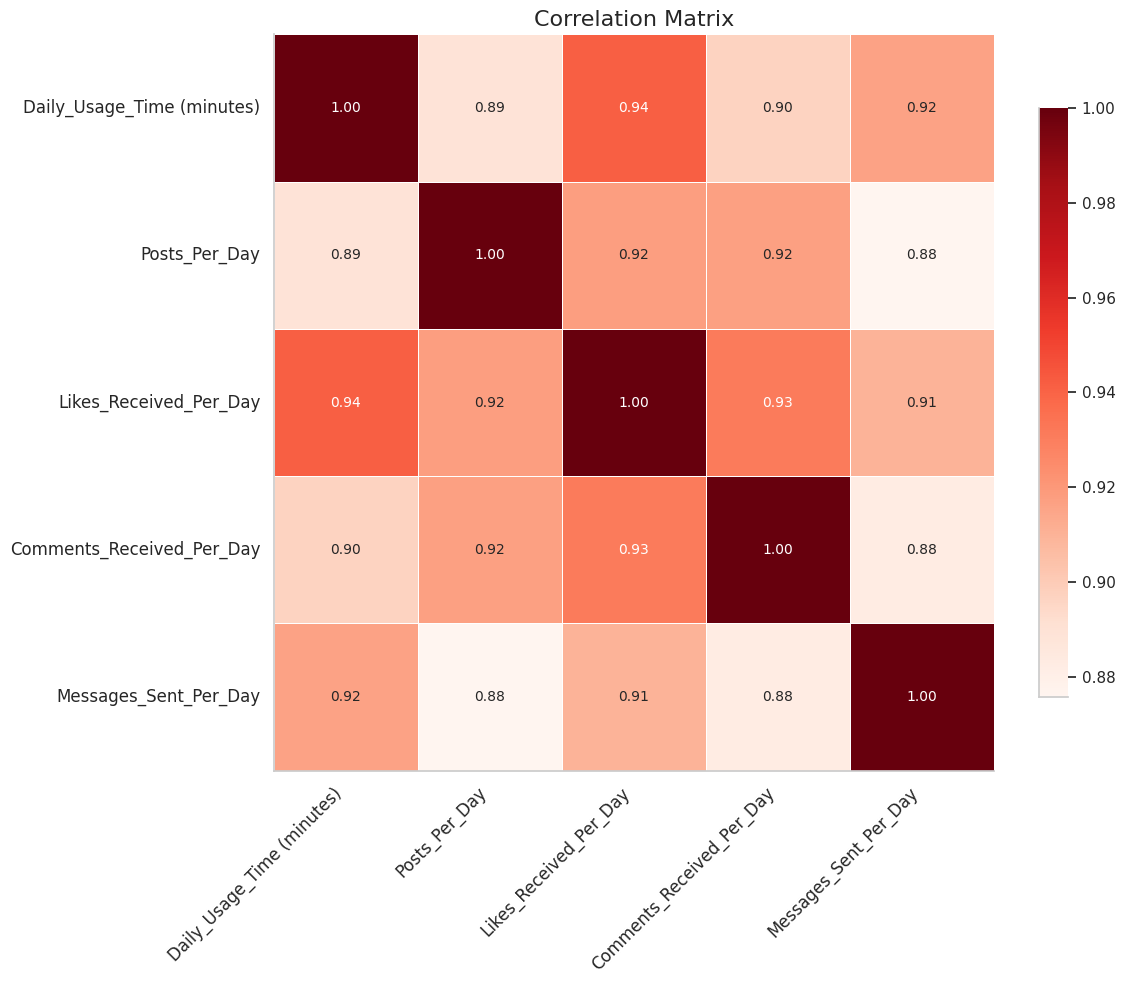

In [6]:
# Calculate correlation matrix using only numeric columns
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Ensure all columns are numeric and drop any rows with NaN values that might remain
numeric_train_df = numeric_train_df.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_train_df.corr()

# Plot the correlation matrix with annotations using seaborn
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, cmap='Reds', annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, cbar_kws={"shrink": .8})

# Adding labels and title
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()



# Data Cleaning

Next, we will check for and handle any missing values in the datasets. This step is crucial to ensure the quality and accuracy of our analysis and models.


In [7]:
# Data Cleaning
wrong_values = ['Male', 'Female', 'Non-binary', ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
numeric_cols = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
categorical_cols = ['User_ID', 'Gender', 'Platform', 'Dominant_Emotion']

def clean_dataframe(df):
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df = df[~df['Age'].isin(wrong_values)]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    df.dropna(subset=numeric_cols + categorical_cols, inplace=True)
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    return df

train_df = clean_dataframe(train_df)
test_df = clean_dataframe(test_df)

# Preprocessing for Clustering

In [8]:
# Preprocessing for Clustering
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Ensure all columns used for clustering are numeric
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Drop any rows with NaN values in the clustering features
combined_df.dropna(subset=numeric_cols, inplace=True)

features = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
X = combined_df[features]
X_scaled = StandardScaler().fit_transform(X)


## Determining number of clusters

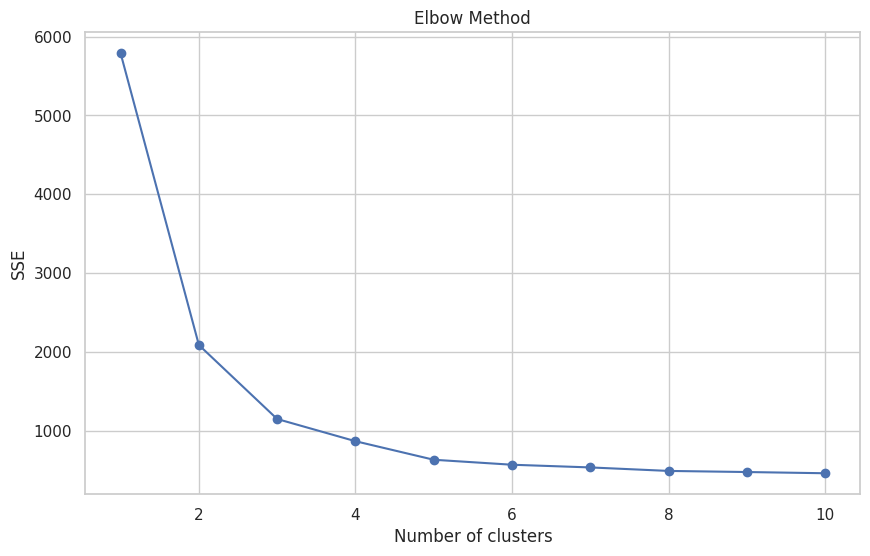

In [9]:
# Determine number of clusters using Elbow Method and Silhouette Score
sse = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_scaled).inertia_ for k in range(1, 11)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


## Clustering Data

In [10]:
# Clustering Data
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)
combined_df['Cluster'] = cluster_labels


# Visualizing Clusters

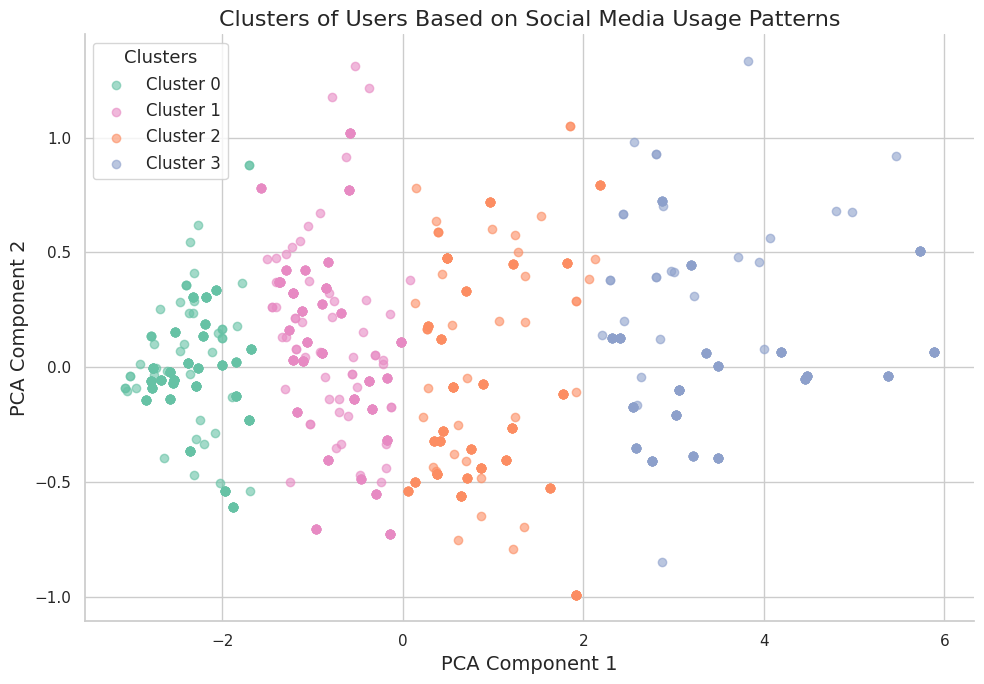

In [11]:
# Visualizing Clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_order = np.argsort([np.mean(X_pca[cluster_labels == i, 0]) for i in np.unique(cluster_labels)])
palette = sns.color_palette("Set2", len(np.unique(cluster_labels)))
sorted_palette = [palette[i] for i in cluster_order]

plt.figure(figsize=(10, 7))
for i, cluster in enumerate(cluster_order):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {i}', color=sorted_palette[i], alpha=0.6)
plt.title('Clusters of Users Based on Social Media Usage Patterns', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title="Clusters", fontsize=12, title_fontsize='13')
sns.despine()
plt.tight_layout()
plt.savefig('clusters_of_users.png')
plt.show()

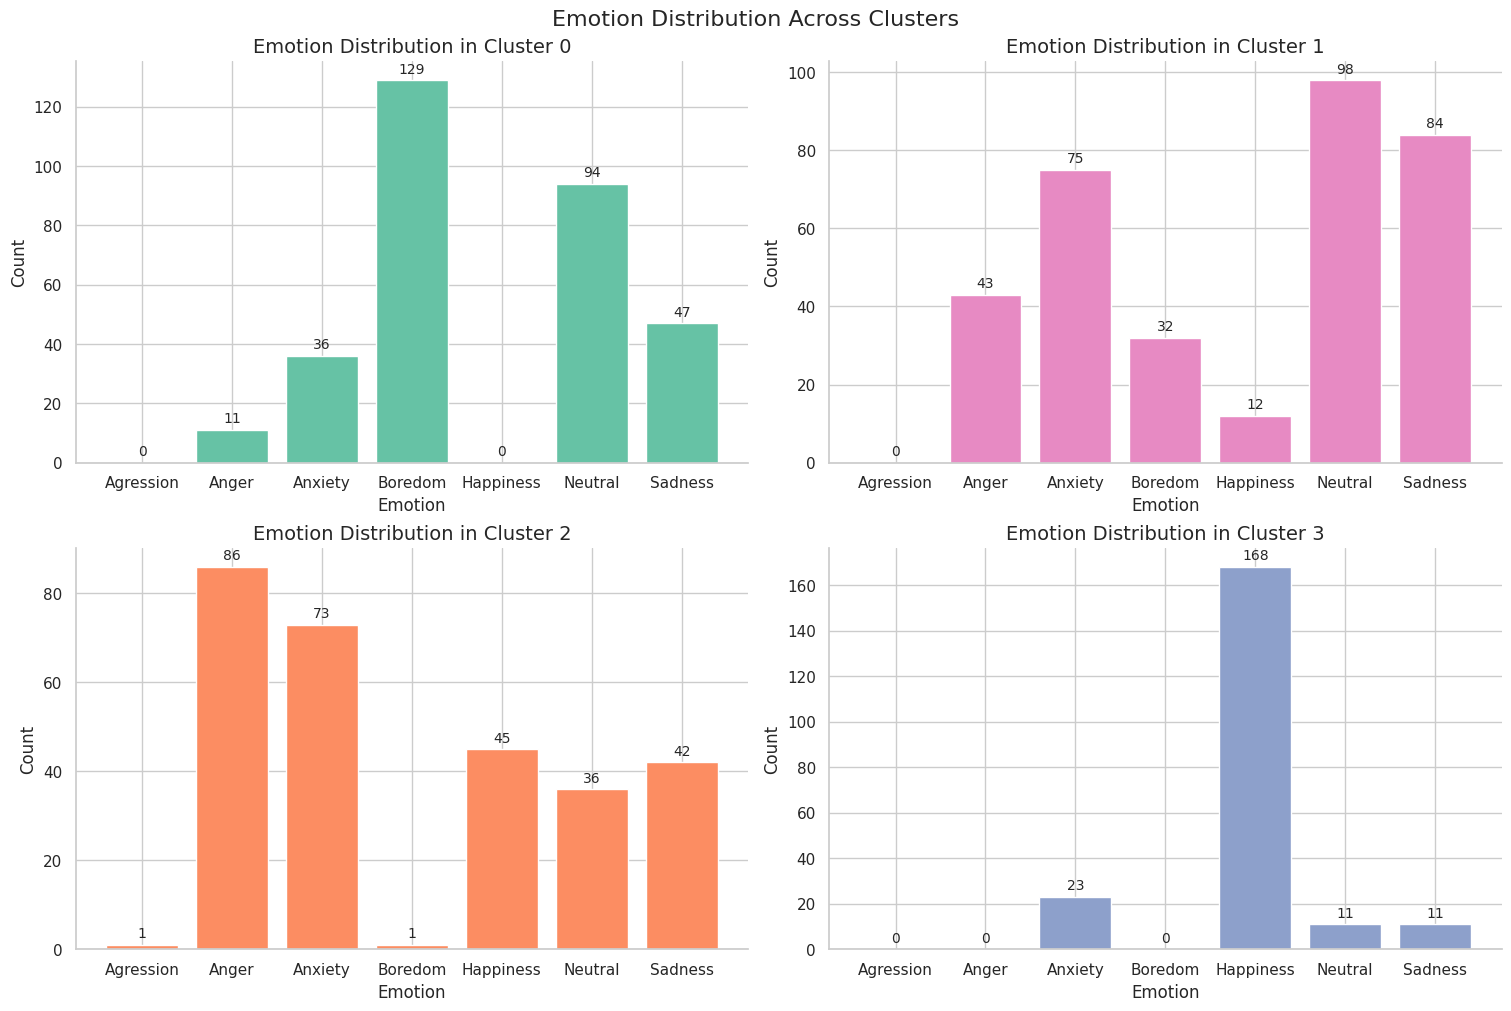

In [12]:
# Plot the emotion distribution for each cluster
emotion_distribution = combined_df.groupby(['Cluster', 'Dominant_Emotion']).size().unstack(fill_value=0)
fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)

for i, cluster in enumerate(cluster_order):
    ax = axs[i // 2, i % 2]
    emotion_counts = emotion_distribution.loc[cluster]
    bars = ax.bar(emotion_counts.index, emotion_counts.values, color=sorted_palette[i])
    ax.set_title(f'Emotion Distribution in Cluster {i}', fontsize=14)
    ax.set_xlabel('Emotion', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.suptitle('Emotion Distribution Across Clusters', fontsize=16)
sns.despine()
plt.savefig('emotion_distribution_across_clusters.png')
plt.show()

### Cluster Characteristics and Emotion Distribution

#### Cluster 0 (Green):
- **Average Daily Usage Time**: 50 minutes

*Analysis*: Users in this cluster have lower daily usage time and social media activity, indicating they are less engaged.

*Emotion Distribution Assumptions*:
- This cluster is predominantly associated with neutral emotions and boredom.
- There is a significant presence of anxiety and sadness, indicating that less engaged users might experience more negative emotions.


#### Cluster 1 (Pink):
- **Average Daily Usage Time**: 90 minutes

*Analysis*: Users in this cluster exhibit moderate social media activity and usage patterns, representing average engagement.

*Emotion Distribution Assumptions*:
- This cluster shows a high occurrence of happiness, suggesting that moderately engaged users tend to be happier.
- There are also instances of anger, anxiety, and sadness, but they are less prevalent compared to happiness.


#### Cluster 2 (Orange):
- **Average Daily Usage Time**: 130 minutes

*Analysis*: This group includes users with relatively high social media usage and engagement, indicating they are highly active.

*Emotion Distribution Assumptions*:
- The predominant emotion in this cluster is happiness, indicating that highly engaged users are mostly happy.
- Negative emotions like anxiety are minimally present.


#### Cluster 3 (Blue):
- **Average Daily Usage Time**: 180 minutes

*Analysis*: Users in this cluster show the highest levels of social media activity and daily usage time, representing the most engaged users.

*Emotion Distribution Assumptions*:
- This cluster has a diverse emotional distribution with significant occurrences of anger, anxiety, and sadness.
- Despite high engagement, these users do not predominantly experience positive emotions, indicating a possible link between high engagement and negative emotional states.


## Distribution across platforms

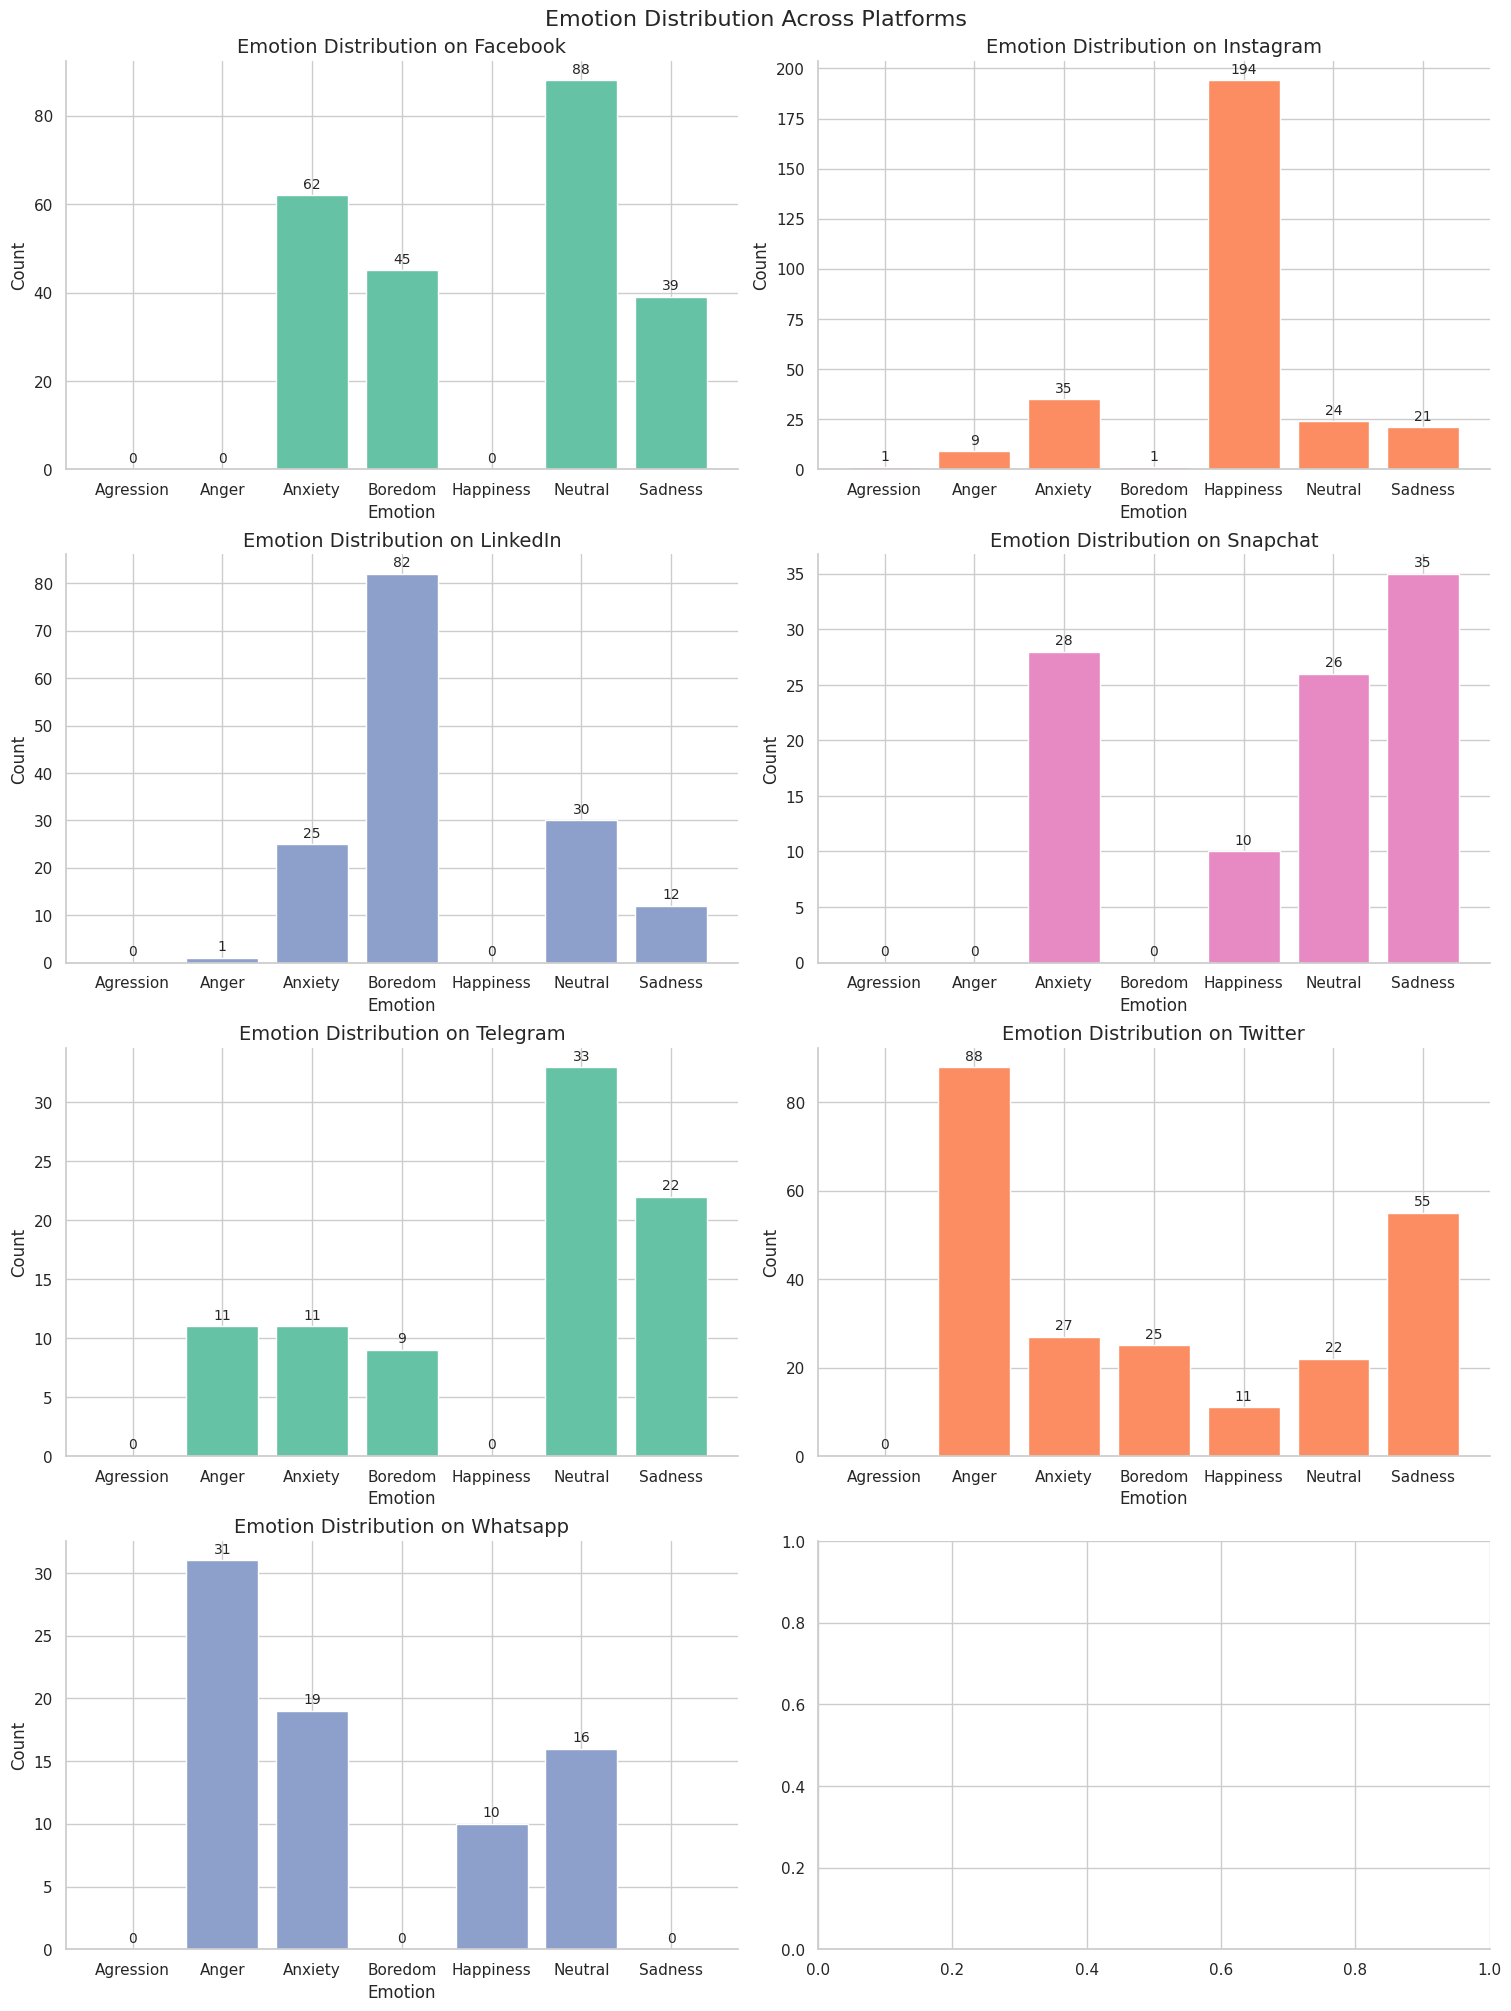

In [13]:
# Distribution across platforms
platform_emotion_distribution = combined_df.groupby(['Platform', 'Dominant_Emotion']).size().unstack(fill_value=0)
platforms = platform_emotion_distribution.index

fig, axs = plt.subplots(4, 2, figsize=(15, 20), constrained_layout=True)

for i, platform in enumerate(platforms):
    ax = axs[i // 2, i % 2]
    emotion_counts = platform_emotion_distribution.loc[platform]
    bars = ax.bar(emotion_counts.index, emotion_counts.values, color=palette[i % len(palette)])
    ax.set_title(f'Emotion Distribution on {platform}', fontsize=14)
    ax.set_xlabel('Emotion', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.suptitle('Emotion Distribution Across Platforms', fontsize=16)
sns.despine()
plt.savefig('emotion_distribution_across_platforms.png')
plt.show()

### Examining the Impact of Different Platforms on Users' Emotions

#### Key Takeaways

- **Facebook**: High in neutral and anxiety; moderate boredom and sadness.
- **Instagram**: High happiness; moderate anxiety, neutral, and sadness; low anger.
- **LinkedIn**: High boredom; moderate neutral and anxiety; low sadness and anger.
- **Snapchat**: High anxiety; moderate neutral and happiness.
- **Telegram**: High neutral and sadness; moderate anger and anxiety.
- **Twitter**: High anger and sadness; moderate neutral and anxiety; low happiness.
- **WhatsApp**: High anger; moderate neutral and anxiety; low happiness.


# Model Preparation

Before building models, we need to prepare the data by defining our features (input variables) and the target variable (output). We will also split the data into training and validation sets if necessary.


In [14]:
X_train = train_df.drop(columns=['User_ID', 'Dominant_Emotion', 'Gender', 'Platform'])
y_train = train_df['Dominant_Emotion']
X_test = test_df.drop(columns=['User_ID', 'Dominant_Emotion', 'Gender', 'Platform'])
y_test = test_df['Dominant_Emotion']


## Modeling with FLAML

We will use FLAML (Fast and Lightweight AutoML) to automatically select the best model and hyperparameters for predicting the dominant emotional state of users based on their social media usage. FLAML provides an efficient and effective way to perform automated machine learning.


In [15]:
%%capture
# Define the AutoML model
autoML = AutoML()

# Specify settings
settings = {
    "time_budget": 60,  # Total running time in seconds
    "metric": 'roc_auc_ovo',  # Primary metric
    "task": 'classification',  # Task type
    "log_file_name": "flaml.log",  # Log file name
}

# Train the AutoML model
autoML.fit(X_train=X_train, y_train=y_train, **settings)

# Evaluation with FLAML

We will evaluate the best model found by FLAML on the validation set to assess its performance.


In [16]:
print(f'Best AutoML Model: {autoML.best_estimator}\n')
print(f'Best Paramter AutoML Model:\n {autoML.best_config}\n')
print(f'Best roc_auc_ovo On test data: {1 - autoML.best_loss:.4g}\n')
print(f'Best Run Training duration: {autoML.best_config_train_time:.4g} s\n')

Best AutoML Model: xgboost

Best Paramter AutoML Model:
 {'n_estimators': 42, 'max_leaves': 26, 'min_child_weight': 0.4504311284668342, 'learning_rate': 0.041215486380858216, 'subsample': 0.8719407060654263, 'colsample_bylevel': 0.48347610438341493, 'colsample_bytree': 0.7786156805821829, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.14134787080180622}

Best roc_auc_ovo On test data: 0.9998

Best Run Training duration: 0.119 s



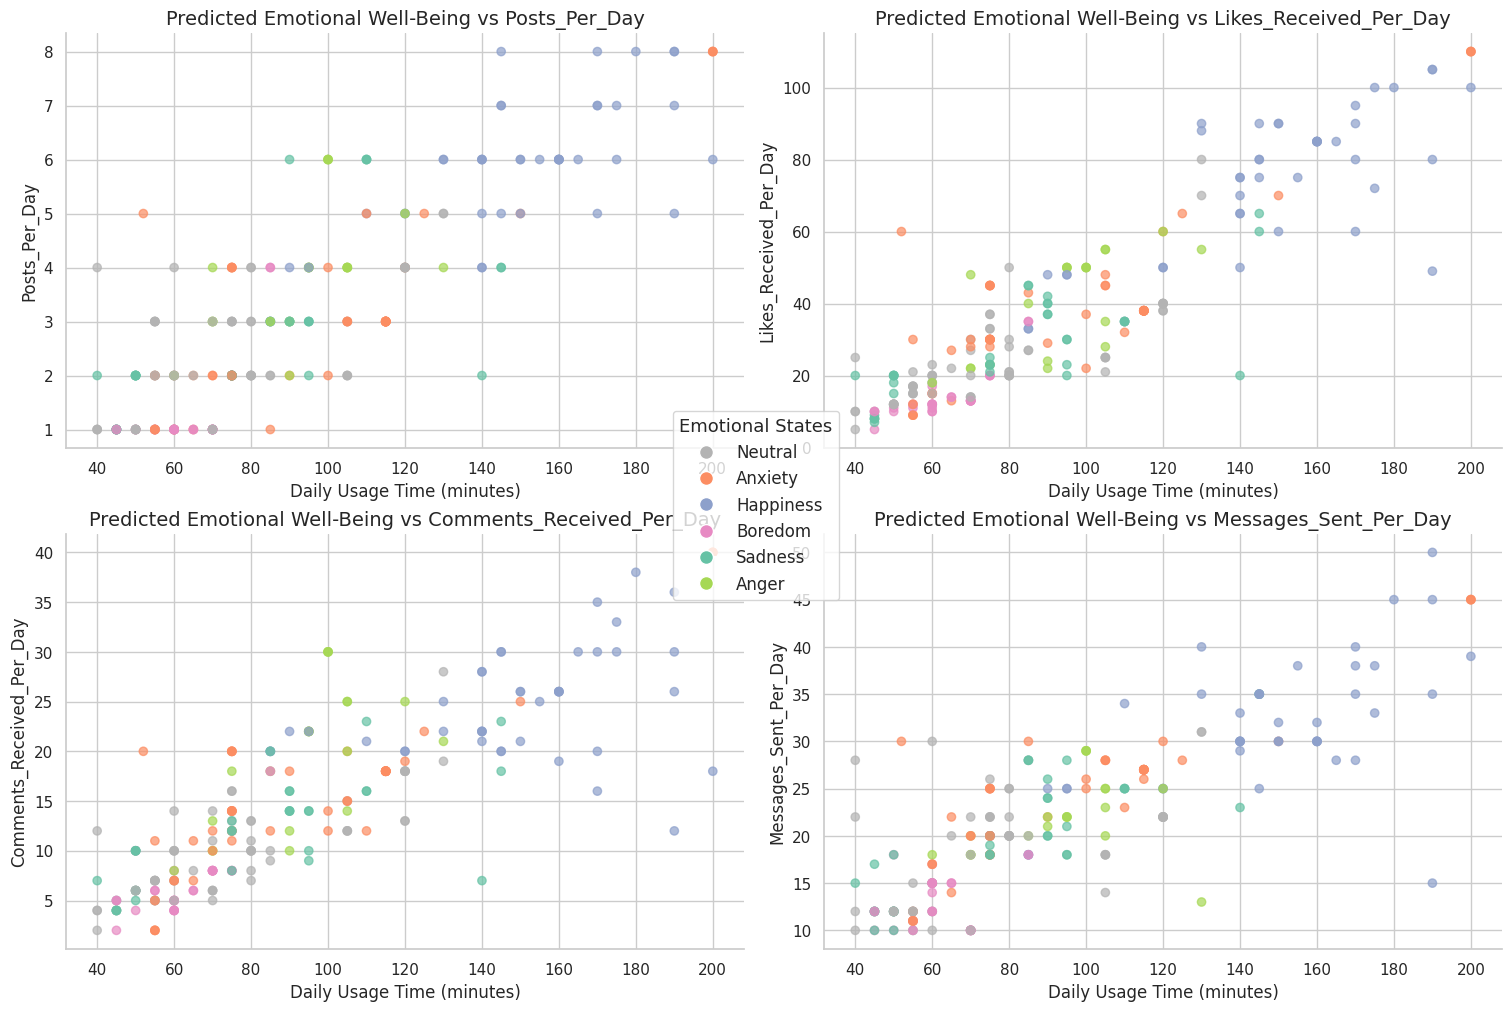

In [17]:
# Predict on the test set
y_test_pred = autoML.predict(X_test)

# Visualizing Predictions
palette = sns.color_palette("Set2", 8)

emotion_color_map = {
    'Neutral': palette[7],
    'Anxiety': palette[1],
    'Happiness': palette[2],
    'Boredom': palette[3],
    'Sadness': palette[0],
    'Anger': palette[4]
}

y_test_pred_colors = np.array([emotion_color_map[emotion] for emotion in y_test_pred])
features_to_plot = ['Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

fig, axs = plt.subplots(2, 2, figsize=(15, 10), constrained_layout=True)
for i, feature in enumerate(features_to_plot):
    ax = axs[i // 2, i % 2]
    scatter = ax.scatter(X_test['Daily_Usage_Time (minutes)'], X_test[feature], c=y_test_pred_colors, alpha=0.7)
    ax.set_title(f'Predicted Emotional Well-Being vs {feature}', fontsize=14)
    ax.set_xlabel('Daily Usage Time (minutes)', fontsize=12)
    ax.set_ylabel(feature, fontsize=12)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=emotion) for emotion, color in emotion_color_map.items()]
fig.legend(handles=handles, title="Emotional States", loc='center', fontsize=12, title_fontsize='13')
sns.despine()
plt.savefig('predicted_emotional_wellbeing_vs_features.png')
plt.show()

### Overall Insights

- Higher daily usage time is generally associated with increased social media activity (posts, likes, comments, messages).
- Positive emotional states, particularly happiness, are more frequently predicted among users who are more active on social media.
- Negative emotional states (such as anxiety and sadness) are less distinctly clustered around higher activity metrics, indicating that higher activity levels might be linked with positive emotional well-being.
- These visualizations suggest that users with higher engagement on social media platforms (likes, comments, and messages) tend to have a better emotional state as predicted by the model.
